In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("project.csv" )
columns_to_keep = ['year','g']
df = data[columns_to_keep]
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)
df

<ipython-input-1-5e75dce84160>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'])


,g
year,
1960-01-01,1.369444e+12
1961-01-01,1.425115e+12
1962-01-01,1.530069e+12
1963-01-01,1.648305e+12
1964-01-01,1.805674e+12
...,...
2018-01-01,8.643942e+13
2019-01-01,8.779853e+13
2020-01-01,8.297824e+13


# **[1](https://machinelearningmastery.com/time-series-trends-in-python/)**

## **Detrend by Differencing**

[link text](https://machinelearningmastery.com/time-series-trends-in-python/)

In [ ]:
from pandas import datetime


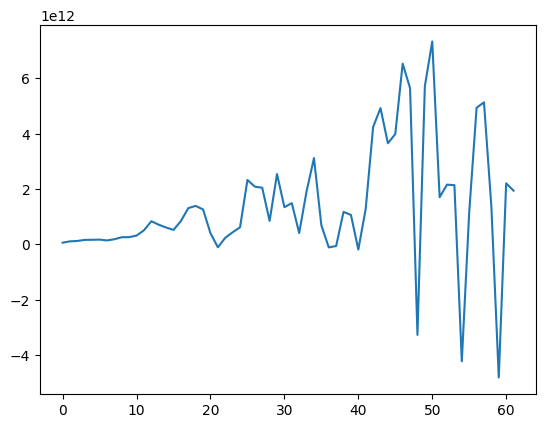

In [3]:
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = df.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

## **Detrend by Model Fitting** (LinearRegression)



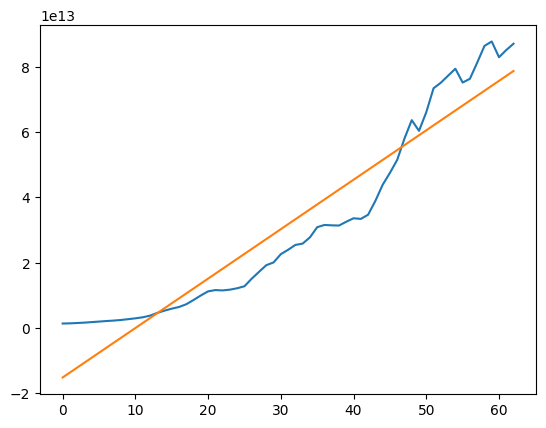

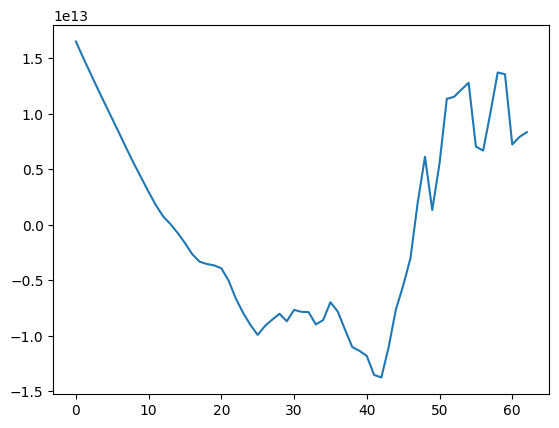

In [5]:

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series =df
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

# **[2](https://forecastegy.com/posts/detrending-time-series-data-python/)**

## **Detrending With A Constant Model (Scipy)**

[link text](https://forecastegy.com/posts/detrending-time-series-data-python/)

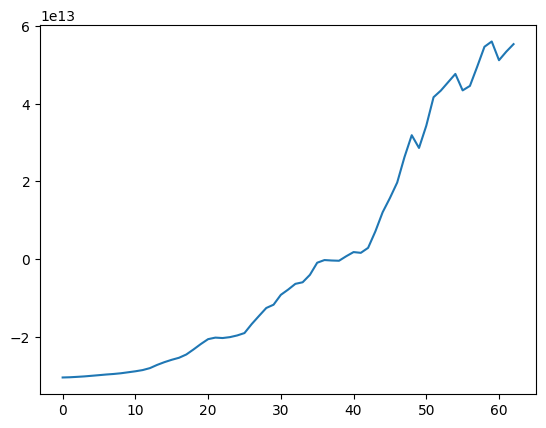

In [6]:
from scipy.signal import detrend

detrended = detrend(df['g'], type='constant')
detrended = pd.Series(detrended, index=data.index)

pyplot.plot(detrended)
pyplot.show()

## **Detrending With A Linear Model (Scipy)**

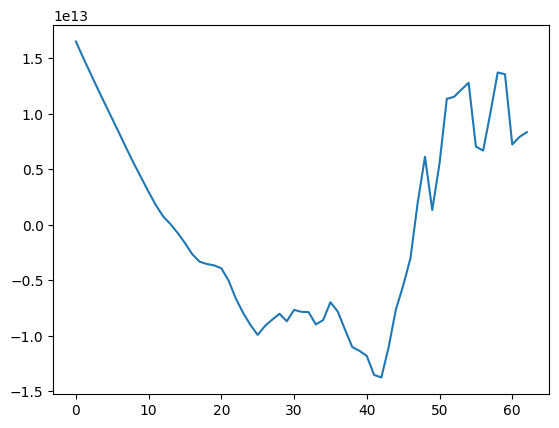

In [7]:
detrended = detrend(df['g'], type='linear')
detrended = pd.Series(detrended, index=data.index)


pyplot.plot(detrended)
pyplot.show()

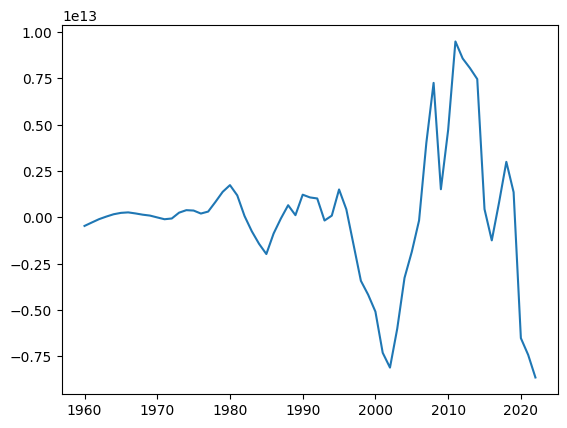

In [8]:
from statsmodels.tsa.tsatools import detrend

detrended = detrend(df['g'], order=2)


pyplot.plot(detrended)
pyplot.show()

## **Detrending With A Moving Average Model (Pandas)**

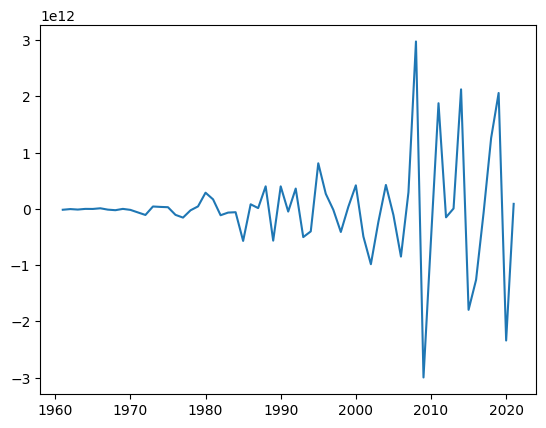

In [40]:
rolling_mean = df['g'].rolling(window=3, center=True).mean()
detrended = df['g'] - rolling_mean


pyplot.plot(detrended)
pyplot.show()

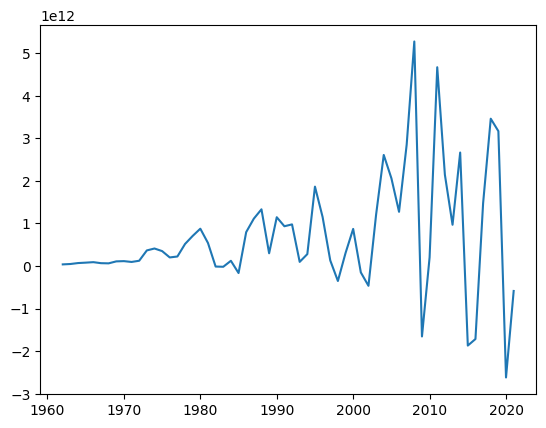

In [41]:
rolling_mean = df['g'].rolling(window=4, center=True).mean()
detrended = df['g'] - rolling_mean


pyplot.plot(detrended)
pyplot.show()

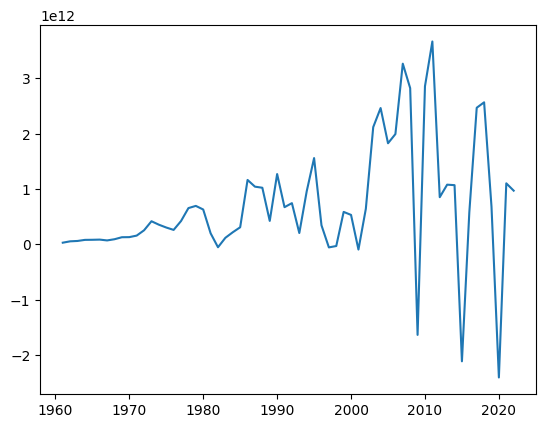

In [56]:
rolling_mean = df['g'].rolling(window=2, center=True).mean()
detrended = df['g'] - rolling_mean


pyplot.plot(detrended)
pyplot.show()

In [57]:
detrended

year
1960-01-01             NaN
1961-01-01    2.783558e+10
1962-01-01    5.247685e+10
1963-01-01    5.911807e+10
1964-01-01    7.868449e+10
                  ...     
2018-01-01    2.566696e+12
2019-01-01    6.795513e+11
2020-01-01   -2.410141e+12
2021-01-01    1.101541e+12
2022-01-01    9.688240e+11
Name: g, Length: 63, dtype: float64

In [44]:


# Check for missing values in each column
missing_values = detrended.isnull().sum()

# Print the results
missing_values

1

In [58]:
import pandas as pd

# Assuming your data is stored in a variable called 'data'

# Check if it is a DataFrame
if isinstance(detrended, pd.DataFrame):
    print("The data is a pandas DataFrame.")

# Check if it is a Series
elif isinstance(detrended, pd.Series):
    print("The data is a pandas Series.")

# If it is neither a DataFrame nor a Series
else:
    print("The data does not appear to be a pandas DataFrame or Series.")

The data is a pandas Series.


In [59]:
import pandas as pd

# Assuming your Series is stored in a variable called 'series_data'

# Convert Series to DataFrame
dataframe = detrended.to_frame()

# Print the resulting DataFrame
dataframe

,g
year,
1960-01-01,NaN
1961-01-01,2.783558e+10
1962-01-01,5.247685e+10
1963-01-01,5.911807e+10
1964-01-01,7.868449e+10
...,...
2018-01-01,2.566696e+12
2019-01-01,6.795513e+11
2020-01-01,-2.410141e+12


In [60]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called 'df_copy'
df_copy = dataframe.copy()
# Backward fill the first missing value
df_copy['g'].fillna(method='bfill', inplace=True)

# Print the updated DataFrame
print(df_copy)

                       g
year                    
1960-01-01  2.783558e+10
1961-01-01  2.783558e+10
1962-01-01  5.247685e+10
1963-01-01  5.911807e+10
1964-01-01  7.868449e+10
...                  ...
2018-01-01  2.566696e+12
2019-01-01  6.795513e+11
2020-01-01 -2.410141e+12
2021-01-01  1.101541e+12
2022-01-01  9.688240e+11

[63 rows x 1 columns]


In [61]:


# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Print the results
missing_values

g    0
dtype: int64

In [62]:
newdf3 = df_copy



# Assuming you have a pandas DataFrame called 'df' with an index column called 'index_col'
newdf3['year'] = newdf3.index  # Create a new column with the index values
newdf3.reset_index(drop=True, inplace=True)  # Remove the index

# Assuming you have a pandas DataFrame called 'df'
last_column = newdf3.columns[-1]  # Get the name of the last column
newdf3 = newdf3[[last_column] + newdf3.columns[:-1].tolist()]

# The last column is now moved to the first position in the DataFrame
newdf3

,year,g
0,1960-01-01,2.783558e+10
1,1961-01-01,2.783558e+10
2,1962-01-01,5.247685e+10
3,1963-01-01,5.911807e+10
4,1964-01-01,7.868449e+10
...,...,...
58,2018-01-01,2.566696e+12
59,2019-01-01,6.795513e+11
60,2020-01-01,-2.410141e+12
61,2021-01-01,1.101541e+12


In [63]:

# Assuming you have a pandas DataFrame called 'df'
newdf3.to_csv('g.csv', index=None)
